1. feladat: Készítsen programot, mely egy fényképezogép raw képei alapján megvilágítás-mérést ˝
végez.
A program tehát egy képet kap bemenetén és kiad egy számot arról, átlagosan hány lux megvilágítás érte az objektívet a kép alkotásakor. Ehhez az alábbiakat használhatja fel:

- a raw kép pixel-adatai: rawpy modul
- a kép EXIF adatai közül az ISO-érzékenység, az apertúra-méret (F-szám) és az expozíciós ido˝
(T): pyexiv2 modul (errol talál anyagot a Moodle-lapon) ˝

Kalibráláshoz felhasználhat mobil-telefon megvilágítás-méro alkalmazását. (Ez persze nem hi- ˝
teles értéket ad, de ha ezzel megy az eljárás, akkor a feladatot megoldotta és a mindennapokban jó
közelítést ad a módszer.)
A megoldáshoz szükséges, hogy 8–10 teszt esetben készítsen fénykép-luxmérés párokat és keressen olyan súlyfaktorokat a szenzor R, G és B komponenseihez, melyekkel azokat felszorozva és
összegezve, majd leosztva az (ISO · T)/F2 mennyiséggel, megkapja a lux-értéket.
(Az (ISO · T)/F2 mennyiséggel azért kell leosztani, hogy kompenzáljuk az eltéro objektív- ˝
fényero, ISO érzékenység és expozíciós id ˝ o hatását.) ˝
Ismertessen röviden egy potenciális alkalmazást ehhez a programhoz!

In [ ]:
!pip install rawpy
!pip install pyexiv2
!pip install numpy
!pip install matplotlib

In [38]:
import rawpy
import pyexiv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [41]:
lux_values = [52.9,226,1430,1920,44.3,102,1800,94.5,179]

In [36]:
def display_image(image_path, text):
    raw = rawpy.imread(image_path)
    rgb = raw.postprocess()
    plt.imshow(rgb)
    plt.axis('off')
    plt.title(os.path.basename(image_path))
    plt.text(10, 10, text, color='white', fontsize=12, backgroundcolor='black')
    plt.show()

In [55]:
def display_images_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.raw', '.nef', '.cr2', '.arw', '.dng')):  # Add other raw file extensions as needed
            image_path = os.path.join(folder_path, filename)
            image_sequence = int(filename.split('.')[0])
            print(image_sequence)
            text = f"Lux: {lux_values[image_sequence-1]}"
            display_image(image_path, text)

#### A kiválsztott képek RAW formátumban és minden képhez a mért LUX érték

8


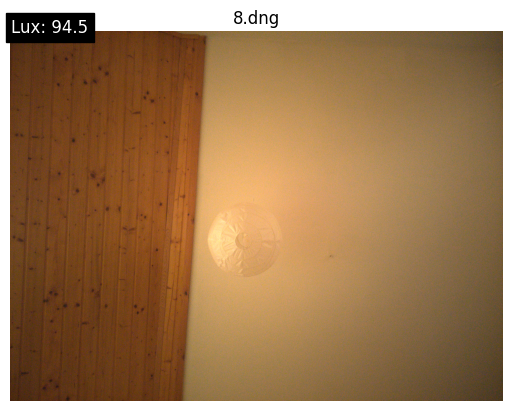

9


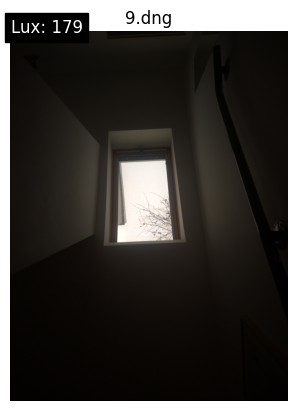

6


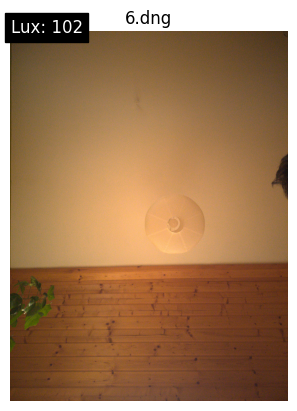

1


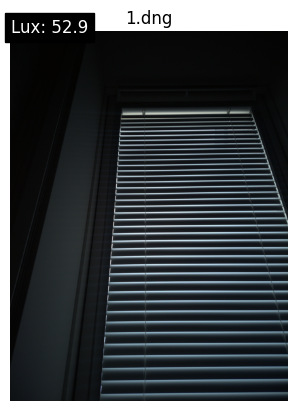

2


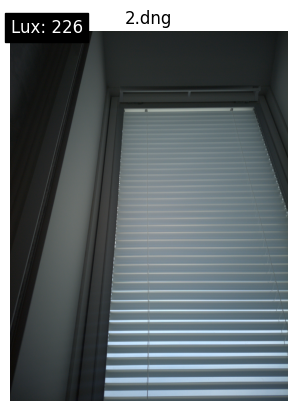

4


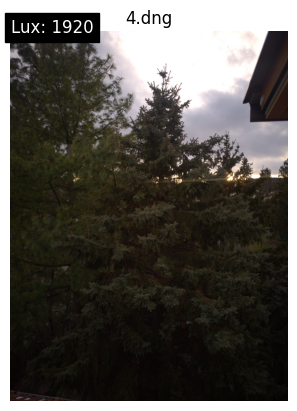

5


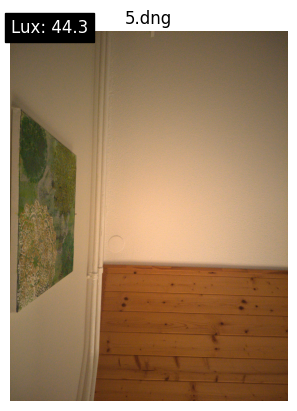

3


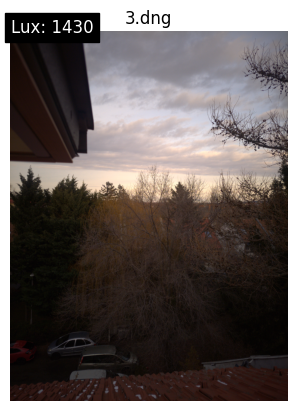

7


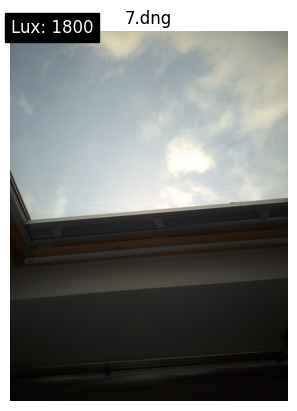

In [56]:
folder_path = 'Imgs'
display_images_in_folder(folder_path)

In [22]:
# read raw images using rawpy
raw_image_path = 'Imgs/1.dng'
with rawpy.imread(raw_image_path) as raw:
        raw_data = raw.raw_image_visible.astype(np.float32)

In [23]:
img = pyexiv2.Image(raw_image_path)
exif_data = img.read_exif_detail()

In [25]:
exposure_time = exif_data['Exif.Image.ExposureTime']
focal_length = exif_data['Exif.Image.FocalLength']
iso_data = exif_data['Exif.Image.ISOSpeedRatings']

In [26]:
exposure_time['value'], focal_length['value'], iso_data['value']

('20000000/1000000000', '523/100', '65')

In [27]:
iso_data['value']

'65'

In [31]:
raw = rawpy.imread(raw_image_path)
    
# Step 2: Convert the raw data to RGB
rgb = raw.postprocess()

# Step 3: Calculate the luminance
# Using the formula: Luminance = 0.2126*R + 0.7152*G + 0.0722*B
luminance = 0.2126 * rgb[:, :, 0] + 0.7152 * rgb[:, :, 1] + 0.0722 * rgb[:, :, 2]

# Step 4: Convert luminance to lux
# Assuming a simple conversion factor for demonstration purposes
lux = np.mean(luminance)  # Adjust the factor as needed

In [32]:
lux

38.11326308126605

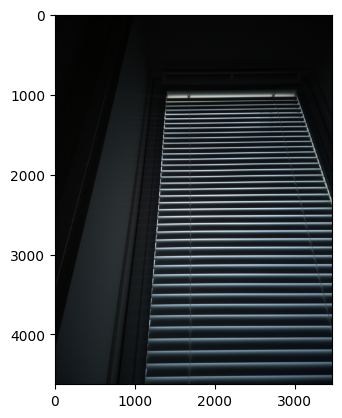

In [35]:
# show the image
og_raw = rawpy.imread(raw_image_path)
plt.imshow(og_raw.postprocess())
plt.show()